# Smart Beta and Factor Investing

This assignment refers to the HBS case: **Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

***

# 2. The Factors

### Data
Use the data found in `data/factor_pricing_data.xlsx`.

Factors: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.

* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.

* The sheet also contains data on five additional factors.

* All factor data is already provided as excess returns

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('../data/factor_pricing_data_monthly.xlsx', sheet_name='factors (excess returns)')
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df.set_index('Date', inplace=True)

### 1. 
Analyze the factors, similar to how you analyzed the three Fama-French factors in `Homework 4`.

You now have three additional factors, so let’s compare there univariate statistics. 

* mean
* volatility    
* Sharpe

In [2]:
Freq = 12
m = df.mean() * Freq
s = df.std() * np.sqrt(Freq)
sr = m / s

summary = pd.DataFrame({
    'Mean': m,
    'Volatility': s,
    'Sharpe': sr
})
summary = summary.round(4)
summary

,Mean,Volatility,Sharpe
MKT,0.0876,0.1561,0.5607
SMB,0.0061,0.1013,0.0604
HML,0.0260,0.1088,0.2392
RMW,0.0440,0.0829,0.5311
CMA,0.0283,0.0725,0.3903
UMD,0.0603,0.1534,0.3933


In [3]:
df_2015 = df[df.index >= '2015-01-01'].copy()

m_2015 = df_2015.mean() * Freq
s_2015 = df_2015.std() * np.sqrt(Freq)
sr_2015 = m_2015 / s_2015

summary_2015 = pd.DataFrame({
    'Mean': m_2015,
    'Volatility': s_2015,
    'Sharpe': sr_2015
})
summary_2015 = summary_2015.round(4)
summary_2015

,Mean,Volatility,Sharpe
MKT,0.1179,0.1574,0.7491
SMB,-0.0238,0.1032,-0.2305
HML,-0.0163,0.1299,-0.1255
RMW,0.0400,0.0726,0.5509
CMA,-0.0091,0.0821,-0.1114
UMD,0.0201,0.1374,0.1464


### 2. 

Based on the factor statistics above, answer the following.
* Does each factor have a positive risk premium (positive expected excess return)? 
* How have the factors performed since the time of the case, (2015-present)?

ANS: Each factor has a positive risk premium when we look at full sample. However, the risk premium of SMB, HML, CMA turn negative if we just look at the time period after 2015.

### 3. 

Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

Correlation Matrix (across six factors):


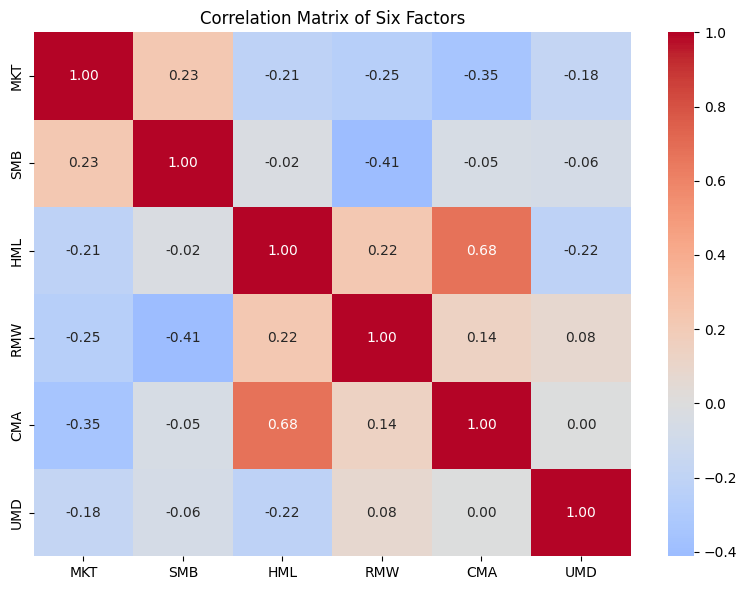

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
print("Correlation Matrix (across six factors):")
#print(corr_matrix.round(3))

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Six Factors")
plt.tight_layout()
plt.show()

ANS: Most correlation is lower than 0.4, shows that the construction method succeeds in keeping correlations small.

ANS: HML’s high correlation with CMA (+0.68) and a smaller positive link with RMW (+0.22) imply HML overlaps with the investment/profitability dimensions that FF5 added. It’s not perfectly collinear, so HML can still add some nuance, but the strong HML–CMA overlap supports the “somewhat redundant” view.

### 4. 

Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

In [5]:
mean_returns = df.mean()
cov_matrix = df.cov()

inv_cov = np.linalg.inv(cov_matrix)
ones = np.ones(len(df.columns))
weights = inv_cov @ mean_returns
weights = weights / (ones @ weights) 

tangency_weights = pd.Series(weights, index=df.columns)
print("Tangency Portfolio Weights (6 factors):")
print(tangency_weights.round(4))

port_mean = mean_returns @ tangency_weights
port_vol = np.sqrt(tangency_weights.T @ cov_matrix @ tangency_weights)
sharpe_ratio = port_mean / port_vol
print(f"\nTangency Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")

Tangency Portfolio Weights (6 factors):
MKT    0.2186
SMB    0.0668
HML   -0.0212
RMW    0.3018
CMA    0.3214
UMD    0.1125
dtype: float64

Tangency Portfolio Sharpe Ratio: 0.3468


ANS: CMA factor seems the most important (0.32), while the HML factor seems the least important(-0.02). The factor with lowest mean return is SMB, it still has 6.7% weight in the tengency portfolio.

In [7]:
subset = df[['MKT', 'SMB', 'HML', 'UMD']]

mean4 = subset.mean()
cov4 = subset.cov()

inv_cov4 = np.linalg.inv(cov4)
ones4 = np.ones(len(subset.columns))
weights4 = inv_cov4 @ mean4
weights4 = weights4 / (ones4 @ weights4)

tangency_weights_4 = pd.Series(weights4, index=subset.columns)
print("\nTangency Portfolio Weights (4 factors):")
print(tangency_weights_4.round(4))

port_mean4 = mean4 @ tangency_weights_4
port_vol4 = np.sqrt(tangency_weights_4.T @ cov4 @ tangency_weights_4)
sharpe_ratio4 = port_mean4 / port_vol4
print(f"\nTangency Portfolio Sharpe Ratio (4 factors): {sharpe_ratio4:.4f}")


Tangency Portfolio Weights (4 factors):
MKT    0.3765
SMB   -0.0512
HML    0.3653
UMD    0.3094
dtype: float64

Tangency Portfolio Sharpe Ratio (4 factors): 0.2638



ANS: MKT factor seems the most important (0.38), while the SMB factor seems the least important(-0.05).

SMB has low weight in both portfolio, so it seems last important. Meanwhile, HML is only impotant when CMA and RMW is not been consider. This states that HML is redundant by CMA abd RMW.

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

Our labeling of the last model as the **AQR** is just for concreteness. The firm is well-known for these factors and an unused case study discusses that further.

For instance, for the AQR model is...

$$
\mathbb{E}[\tilde{r}^i] 
= \beta^{i,\mathrm{MKT}} \, \mathbb{E}[\tilde{f}^{\mathrm{MKT}}] 
+ \beta^{i,\mathrm{HML}} \, \mathbb{E}[\tilde{f}^{\mathrm{HML}}] 
+ \beta^{i,\mathrm{RMW}} \, \mathbb{E}[\tilde{f}^{\mathrm{RMW}}] 
+ \beta^{i,\mathrm{UMD}} \, \mathbb{E}[\tilde{f}^{\mathrm{UMD}}]
$$

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

$$
\tilde{r}^i_t 
= \alpha^i 
+ \beta^{i,\mathrm{MKT}} \tilde{f}^{\mathrm{MKT}}_t 
+ \beta^{i,\mathrm{HML}} \tilde{f}^{\mathrm{HML}}_t 
+ \beta^{i,\mathrm{RMW}} \tilde{f}^{\mathrm{RMW}}_t 
+ \beta^{i,\mathrm{UMD}} \tilde{f}^{\mathrm{UMD}}_t 
+ \varepsilon_t
$$

### Data

* Monthly excess return data on `n=49` equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . .$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

In [9]:
returns = pd.read_excel('../data/factor_pricing_data_monthly.xlsx', sheet_name='portfolios (excess returns)')
returns['Date'] = pd.to_datetime(returns['Date'], format='%Y%m')
returns.set_index('Date', inplace=True)
returns.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0073,0.0285,0.0084,0.1009,-0.0143,0.0995,0.0348,0.0323,0.0048,0.0059,...,0.0158,0.0851,0.0466,-0.0125,0.0430,-0.0284,0.0254,0.0770,0.0306,0.0666
1980-02-29,0.0125,-0.0609,-0.0967,-0.0323,-0.0575,-0.0316,-0.0492,-0.0803,-0.0556,-0.0169,...,-0.0083,-0.0543,-0.0345,-0.0641,-0.0653,-0.0824,-0.0960,-0.0352,-0.0283,-0.0273
1980-03-31,-0.2220,-0.1119,-0.0158,-0.1535,-0.0188,-0.1272,-0.0827,-0.1238,-0.0567,-0.0670,...,-0.0819,-0.1512,-0.1602,-0.0905,-0.1450,-0.0559,-0.0877,-0.2449,-0.1261,-0.1737
1980-04-30,0.0449,0.0767,0.0232,0.0289,0.0830,-0.0529,0.0785,0.0154,0.0305,0.0115,...,0.0422,-0.0102,0.0268,0.0355,0.0539,0.0736,0.0528,0.0964,0.0458,0.0784
1980-05-31,0.0635,0.0797,0.0458,0.0866,0.0822,0.0510,0.0325,0.0888,0.0560,0.0098,...,0.0564,0.1065,0.1142,0.0877,0.1104,0.0570,0.0560,0.0889,0.0846,0.0663


### 1. 

Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)

For each regression, report the estimated α and r-squared.


In [10]:
import statsmodels.api as sm

factors = df[['MKT', 'HML', 'RMW', 'UMD']]

def time_series_regression(asset_ret, factors):
    y = asset_ret
    X = sm.add_constant(factors) 
    model = sm.OLS(y, X).fit()
    alpha = model.params['const']
    r_squared = model.rsquared
    return alpha, r_squared, model

# monthly alpha, not yet annualized
results = []

for asset in returns.columns:
    alpha, r2, model = time_series_regression(returns[asset], factors)
    results.append({'Asset': asset, 'Alpha': alpha, 'R2': r2})

results_df = pd.DataFrame(results)
print(results_df)

    Asset     Alpha        R2
0   Agric  0.000971  0.342074
1   Food   0.000125  0.455064
2   Soda   0.001282  0.302544
3   Beer   0.000821  0.414773
4   Smoke  0.003426  0.265363
5   Toys  -0.002809  0.510213
6   Fun    0.003255  0.607213
7   Books -0.003059  0.688933
8   Hshld -0.001062  0.554712
9   Clths -0.001889  0.618968
10  Hlth  -0.003390  0.440858
11  MedEq  0.001364  0.595781
12  Drugs  0.002137  0.489382
13  Chems -0.002928  0.745226
14  Rubbr -0.000377  0.645315
15  Txtls -0.003062  0.547022
16  BldMt -0.002386  0.752532
17  Cnstr -0.002943  0.631500
18  Steel -0.002702  0.628330
19  FabPr -0.002395  0.424538
20  Mach  -0.000438  0.753968
21  ElcEq -0.000396  0.737225
22  Autos  0.001060  0.527758
23  Aero  -0.000585  0.599384
24  Ships -0.003238  0.504624
25  Guns   0.000342  0.324501
26  Gold   0.001262  0.049453
27  Mines -0.001630  0.458887
28  Coal  -0.003301  0.212596
29  Oil   -0.002400  0.455633
30  Util   0.000336  0.361372
31  Telcm  0.000520  0.580416
32  PerSv 

### 2. 

Calculate the mean-absolute-error of the estimated alphas.

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^n|\tilde{\alpha}^i|$$

* If the pricing model worked, should these alpha estimates be large or small? Why?

* Based on your MAE stat, does this seem to support the pricing model or not?

In [11]:
mae_alpha = results_df['Alpha'].abs().mean()
print(f"Mean Absolute Error (MAE) of alphas: {mae_alpha:.6f}")

Mean Absolute Error (MAE) of alphas: 0.002051


* If the pricing model worked, these alpha estimates should be small. Because alpha represents the average excess return that cannot be explained by the model; a pricing model capable of explaining the average return of an asset would attribute these “abnormal” returns to factors, so alpha should approach zero.
* The average absolute alpha of approximately 0.21% per month is relatively small, indicating that the model generally performs well over the time series.

### 2. 

Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?

In [12]:
factors_CAPM = df[["MKT"]]
factors_FF3 = df[["MKT", "SMB", "HML"]]
factors_FF5 = df[["MKT", "SMB", "HML", "RMW", "CMA"]]

def MAE_of_alphas(returns, factors):
    results = []
    for asset in returns.columns:
        alpha, r2, model = time_series_regression(returns[asset], factors)
        results.append(alpha)
    mae_alpha = np.mean(np.abs(results))
    return mae_alpha

mae_capm = MAE_of_alphas(returns, factors_CAPM)
mae_ff3 = MAE_of_alphas(returns, factors_FF3) 
mae_ff5 = MAE_of_alphas(returns, factors_FF5)
print(f"MAE of alphas (CAPM): {mae_capm:.6f}")
print(f"MAE of alphas (FF3): {mae_ff3:.6f}")
print(f"MAE of alphas (FF5): {mae_ff5:.6f}")
print(f"MAE of alphas (AQR): {mae_alpha:.6f}")



MAE of alphas (CAPM): 0.001748
MAE of alphas (FF3): 0.002030
MAE of alphas (FF5): 0.002614
MAE of alphas (AQR): 0.002051


- By the value of MAE, it seems that CAPM is the best fit.

### 3. 

Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

ANS: 

By the result of tengency portfolio, I would state that SMB is unimportant for pricing, and HML is also unimportant for pricing when CMA and RMW be put in the mpdel.

I would argue that Fama and French should not include the Momentum factor in their model. The Fama–French framework was designed to explain cross-sectional differences in expected returns through persistent firm characteristics, such as size, value, and profitability. In contrast, Momentum captures short-term price dynamics driven by behavioral or market sentiment effects, which are less stable and harder to justify as risk-based factors. Including it might blur the theoretical foundation of the model and reduce its interpretability.

### 4. 

This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

In [ ]:

def MAE_of_R2(returns, factors):
    results = []
    for asset in returns.columns:
        alpha, r2, model = time_series_regression(returns[asset], factors)
        results.append(r2)
    mae_r2 = np.mean(results)
    return mae_r2

r2_capm = MAE_of_R2(returns, factors_CAPM)
r2_ff3 = MAE_of_R2(returns, factors_FF3) 
r2_ff5 = MAE_of_R2(returns, factors_FF5)
print(f"R2 (CAPM): {r2_capm:.6f}")
print(f"R2 (FF3): {r2_ff3:.6f}")
print(f"R2 (FF5): {r2_ff5:.6f}")
print(f"R2 (AQR): {results_df['R2'].mean():.6f}")

R2 (CAPM): 0.522622
R2 (FF3): 0.567874
R2 (FF5): 0.591768
R2 (AQR): 0.571935


ANS: Yes. The models produce moderately high time-series R² values (around 0.52–0.59), meaning they explain a large portion of the variation in portfolio returns.

### 5. 

We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.

* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

#### Footnote:

Recall that we found in `Homework 4` that the market premium went from being strongly positive to strongly negative when estimated in the cross-section.

In [15]:
factor_groups = {'CAPM': factors_CAPM,
         'FF3': factors_FF3,
         'FF5': factors_FF5,
         'AQR': df[['MKT', 'HML', 'RMW', 'UMD']],
         }


def analyze_factor_betas(returns: pd.DataFrame, factor_groups: dict):
    results = {}
    for name, factors in factor_groups.items():
        factor_names = factors.columns
        betas = []
        for asset in returns.columns:
            y = returns[asset]
            X = sm.add_constant(factors)
            model = sm.OLS(y, X).fit()
            beta_values = model.params[1:]  
            betas.append(beta_values)
        beta_df = pd.DataFrame(betas, index=returns.columns)
        results[name] = beta_df
        mean_beta = beta_df.mean()
        mean_returns = returns.mean(axis=0)
        X = sm.add_constant(beta_df)
        model2 = sm.OLS(mean_returns, X).fit()
        result_df = pd.DataFrame({
            "Factor": factor_names,
            "Avg_Beta": mean_beta.values,
            "Cross_Beta": model2.params[factor_names].values
        })
        results[name] = result_df
    return results

beta_results = analyze_factor_betas(returns, factor_groups)
for name, df_result in beta_results.items():
    print(f"\n{name} Factor Betas Analysis:")
    print(df_result.round(4))



CAPM Factor Betas Analysis:
  Factor  Avg_Beta  Cross_Beta
0    MKT    1.0141      0.0007

FF3 Factor Betas Analysis:
  Factor  Avg_Beta  Cross_Beta
0    MKT    1.0154      0.0032
1    SMB    0.1761     -0.0033
2    HML    0.1883     -0.0018

FF5 Factor Betas Analysis:
  Factor  Avg_Beta  Cross_Beta
0    MKT    1.0430      0.0034
1    SMB    0.2583     -0.0035
2    HML    0.1106     -0.0022
3    RMW    0.2672      0.0016
4    CMA    0.0952     -0.0018

AQR Factor Betas Analysis:
  Factor  Avg_Beta  Cross_Beta
0    MKT    1.0442      0.0014
1    HML    0.1495     -0.0027
2    RMW    0.1472      0.0015
3    UMD   -0.0632      0.0000


It is quite common for the average betas obtained from time-series regressions and the coefficients from cross-sectional regressions to differ substantially. In fact, this difference is expected and theoretically justified, because the two procedures measure fundamentally different economic concepts.

In a time-series regression, the estimated coefficients capture each asset’s exposure or sensitivity to the underlying risk factors. They indicate how an asset’s return co-moves with the factors over time. 

By contrast, in a cross-sectional regression the coefficients represent the prices of risk, that is, how much expected return investors require per unit of factor exposure. 

Therefore, time-series betas describe risk loadings, whereas cross-sectional betas (or risk premia) describe compensation for those risks. They are conceptually and dimensionally different, so there is no reason for the numerical values to be similar.

In [16]:
factor_groups = {
    'CAPM': factors_CAPM,
    'FF3': factors_FF3,
    'FF5': factors_FF5,
    'AQR': df[['MKT', 'HML', 'RMW', 'UMD']],
}

def analyze_factor_betas(returns: pd.DataFrame, factor_groups: dict):
    mae_table = []

    for name, factors in factor_groups.items():
        factor_names = factors.columns
        betas = []
        alphas = []

        for asset in returns.columns:
            y = returns[asset]
            X = sm.add_constant(factors)
            model = sm.OLS(y, X).fit()
            betas.append(model.params[1:])   # beta
            alphas.append(model.params[0])   # alpha

        beta_df = pd.DataFrame(betas, index=returns.columns)
        mean_beta = beta_df.mean()
        mean_returns = returns.mean(axis=0)

        # === Step 2: Cross-sectional regression (mean return ~ betas) ===
        X = sm.add_constant(beta_df)
        #X = beta_df
        model2 = sm.OLS(mean_returns, X).fit()
        residuals_cs = model2.resid  # cross-sectional residuals

        mae_alpha = np.mean(np.abs(alphas))       # time-series α 的 MAE
        mae_residual = np.mean(np.abs(residuals_cs))  # cross-sectional residual 的 MAE

        mae_table.append({
            "Model": name,
            "MAE_Alpha": mae_alpha,
            "MAE_Residual": mae_residual
        })

    return pd.DataFrame(mae_table)


mae_results = analyze_factor_betas(returns, factor_groups)
print("\n=== MAE Comparison (Time-series α vs Cross-sectional residuals) ===")
print(mae_results.round(6))


C:\Users\Theem\AppData\Local\Temp\ipykernel_24228\3762070648.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas.append(model.params[0])   # alpha
C:\Users\Theem\AppData\Local\Temp\ipykernel_24228\3762070648.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas.append(model.params[0])   # alpha
C:\Users\Theem\AppData\Local\Temp\ipykernel_24228\3762070648.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas.appen


=== MAE Comparison (Time-series α vs Cross-sectional residuals) ===
  Model  MAE_Alpha  MAE_Residual
0  CAPM   0.001748      0.001267
1   FF3   0.002030      0.001000
2   FF5   0.002614      0.000998
3   AQR   0.002051      0.001134


C:\Users\Theem\AppData\Local\Temp\ipykernel_24228\3762070648.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas.append(model.params[0])   # alpha
C:\Users\Theem\AppData\Local\Temp\ipykernel_24228\3762070648.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas.append(model.params[0])   # alpha



The MAE_alpha and MAE_residual do not need to, and in fact should not, be identical, because they would only coincide theoretically if the cross-sectional regression line were constrained to pass through the origin and its slope were fixed at the factor’s average excess mean.

***